<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/DolBaKi/7-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###딥러닝 기초
 * MNIST는 데이터셋의 일종
 * 딥러닝이란
 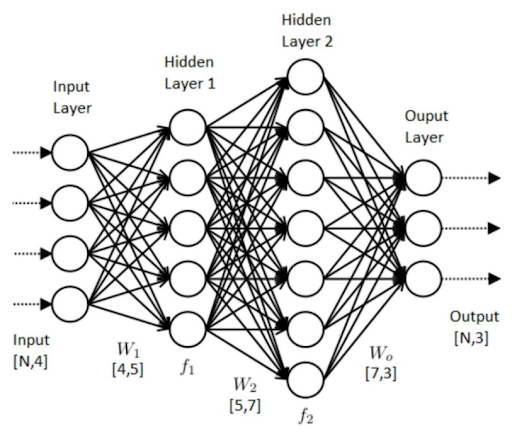
 이거라고 생각하면 편할 거 같다

In [4]:
from tensorflow import keras
(train_input,train_target),(test_input,test_target) =\
  keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
print(train_input.shape,train_target.shape)

(60000, 28, 28) (60000,)


In [6]:
print(test_input.shape,test_target.shape)

(10000, 28, 28) (10000,)


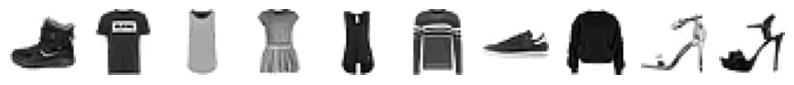

In [9]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(1,10,figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i],cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [10]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [11]:
import numpy as np
print(np.unique(train_target,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [13]:
train_scaled=train_input/255
train_scaled=train_scaled.reshape(-1,28*28)

In [16]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

a=int(input("max_iter를 지정해주세요 : "))

sc=SGDClassifier(loss='log_loss', max_iter=a, random_state=42)

scores=cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))
print("차승우가 직접 만든 max_iter 대입기")

max_iter를 지정해주세요 : 18
0.8400500000000001
차승우가 직접 만든 max_iter 대입기


###인공 신경망
 * 뉴런->유닛
 * 딥러닝이란 심층 인공 신경망(?)
 * 뉴런을 잇는 가장 기본적인 층을 밀집층

In [17]:
import tensorflow as tf
from tensorflow import keras

In [18]:
from sklearn.model_selection import train_test_split

train_scaled,val_scaled,train_target,val_target=train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42)

In [19]:
print(train_scaled.shape,train_target.shape)

(48000, 784) (48000,)


In [21]:
print(val_scaled.shape,val_target.shape)

(12000, 784) (12000,)


In [22]:
dense=keras.layers.Dense(10,activation='softmax',input_shape=(784,)) # 10은 뉴런 갯수, activation으로 로지스틱이 출력 적용 함수 입력 크기는 input_shape
 # dense는 기본 밀집층을 만든다

In [24]:
model=keras.Sequential(dense)
 # 신경망 모델 만드는 클래스
 # 두뇌를 제작하기 위한 회로도를 만든다고 생각하면 된다(?)

In [25]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy') # categorial : 다중 분류, binary : 이진 분류

In [26]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [27]:
a=int(input("에포크 설정 : "))
model.fit(train_scaled,train_target,epochs=a)

에포크 설정 : 5
Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6092 - accuracy: 0.7933
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4746 - accuracy: 0.8394
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4506 - accuracy: 0.8462
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4382 - accuracy: 0.8512
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4299 - accuracy: 0.8548


In [28]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.4456 - accuracy: 0.8451


[0.44562914967536926, 0.8450833559036255]